In [1]:
import numpy as np
import glob

outdir = "/scratch/sbanerj/trans-eqtl/dev-pipeline/lmcorrected/gtex-ms/tejaas/mafnull_sb0.01/chr7"
outfiles = glob.glob( outdir + "/chunk*_rr.txt")

outdir_random = "/scratch/sbanerj/trans-eqtl/dev-pipeline/lmcorrected/gtex-ms/tejaas_rand/mafnull_sb0.01/chr7"
outfiles_random = glob.glob( outdir_random + "/chunk*_rr.txt")

#outdir_peer = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex-ms_35peer/tejaas/permnull_sb0.01/chr7"
#outfiles_peer = glob.glob( outdir_peer + "/chunk*_rr.txt")

In [2]:
def read_tejaas_rr_pvals(outfiles):
    pvals = list()
    for filename in outfiles:
        with open(filename, "r") as mfile:
            next(mfile)
            for line in mfile:
                pvals.append(float(line.split()[5]))
    pvals = np.array(pvals)
    return pvals

pvals = read_tejaas_rr_pvals(outfiles)
pvals_random = read_tejaas_rr_pvals(outfiles_random)
#pvals_peer = read_tejaas_rr_pvals(outfiles_peer)

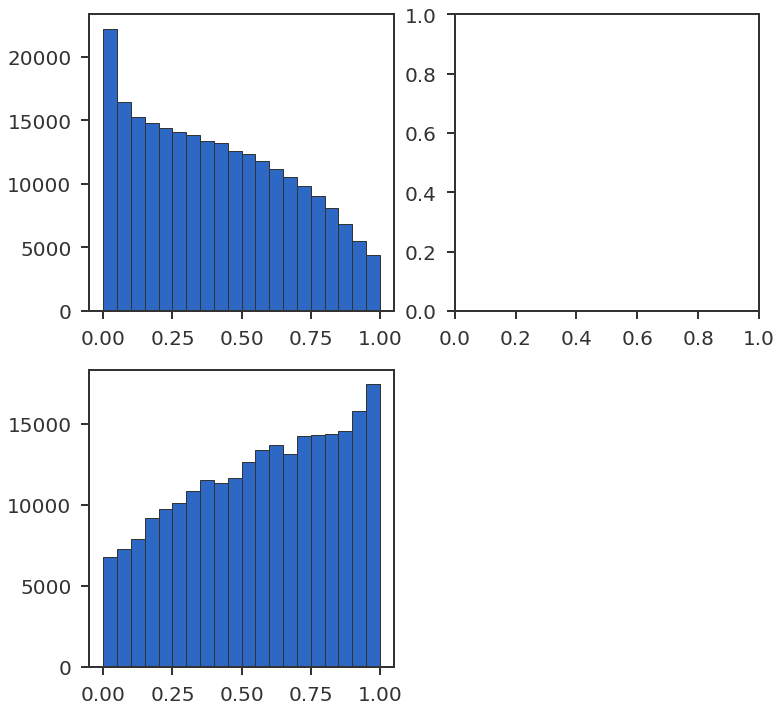

In [4]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'system')

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.hist(pvals_random)
#ax2.hist(pvals_peer)
ax3.hist(pvals)
plt.show()